In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/drug200.csv")
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
a=pd.get_dummies(data[["Sex","BP","Cholesterol"]],drop_first=True)
col2=a.columns

In [ ]:
col1=data.columns

In [ ]:
data=pd.concat([data,a],axis=1)
data.columns=col1.append(col2)
data=data.drop(["Sex","BP","Cholesterol"],axis=1)

In [ ]:
data

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,DrugY,0,0,0,0
1,47,13.093,drugC,1,1,0,0
2,47,10.114,drugC,1,1,0,0
3,28,7.798,drugX,0,0,1,0
4,61,18.043,DrugY,0,1,0,0
...,...,...,...,...,...,...,...
195,56,11.567,drugC,0,1,0,0
196,16,12.006,drugC,1,1,0,0
197,52,9.894,drugX,1,0,1,0
198,23,14.020,drugX,1,0,1,1


In [ ]:
X=data.drop(["Drug"],axis=1)
y=data["Drug"]

In [ ]:
X1=X.copy()
y1=y.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# **Ensemble techniques**

A diverse group of people are likely to make better decisions as compared to individuals. Similar is true for a diverse set of models in comparison to single models. This diversification in Machine Learning is achieved by a technique called Ensemble Learning.

# **Simple Ensemble Techniques**

**Max Voting**

The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction.

You can consider this as taking the mode of all the predictions.


In [ ]:
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict(x_test)
pred2=model2.predict(x_test)
pred3=model3.predict(x_test)

final_pred = []
for i in range(0,len(x_test)):
	final_pred.append(stats.mode([pred1[i], pred2[i], pred3[i]])[0][0])


In [ ]:
# final_pred

In [ ]:
y_test1=list(y_test)


In [ ]:
len(y_test1)

66

In [ ]:
l=[]
for i in range(len(y_test1)):
  if y_test1[i]!=final_pred[i]:
    l.append(i)

len(l)

1

In [ ]:
l1=[]
for i in range(len(y_test1)):
  if y_test1[i]!=pred1[i]:
    l1.append(i)

len(l1)

0

In [ ]:
l1=[]
for i in range(len(y_test1)):
  if y_test1[i]!=pred2[i]:
    l1.append(i)

len(l1)

13

In [ ]:
l1=[]
for i in range(len(y_test1)):
  if y_test1[i]!=pred3[i]:
    l1.append(i)

len(l1)

1

In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(random_state=1)
model3 = KNeighborsClassifier()
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2),("Knn",model3)], voting='hard')
model.fit(x_train,y_train)
model.predict(x_test)


array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'DrugY', 'drugA',
       'drugB', 'DrugY', 'drugB', 'drugX', 'drugC', 'DrugY', 'drugB',
       'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugC', 'drugX',
       'DrugY', 'drugX', 'DrugY', 'drugC', 'drugC', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'drugA', 'DrugY', 'drugA', 'drugX', 'drugX',
       'drugX', 'DrugY', 'DrugY', 'drugC', 'DrugY', 'DrugY', 'drugB',
       'drugX', 'drugX', 'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY',
       'drugA', 'DrugY', 'DrugY', 'DrugY', 'drugA', 'DrugY', 'drugB',
       'DrugY', 'drugX', 'DrugY'], dtype=object)

In [ ]:
l1=[]
for i in range(len(y_test1)):
  if y_test1[i]!=model.predict(x_test)[i]:
    l1.append(i)

len(l1)

1

**Averaging**


In this method, we take an average of predictions from all the models and use it to make the final prediction. Averaging can be used for making predictions in regression problems or while calculating probabilities for classification problems.


In [ ]:
# model1 = tree.DecisionTreeClassifier()
# model2 = KNeighborsClassifier()
# model3= LogisticRegression()

# model1.fit(x_train,y_train)
# model2.fit(x_train,y_train)
# model3.fit(x_train,y_train)

# pred1=model1.predict_proba(x_test)
# pred2=model2.predict_proba(x_test)
# pred3=model3.predict_proba(x_test)

# finalpred=(pred1+pred2+pred3)/3


**Weighted Averaging**

This is an extension of the averaging method. All models are assigned different weights defining the importance of each model for prediction. 


In [ ]:
# model1 = tree.DecisionTreeClassifier()
# model2 = KNeighborsClassifier()
# model3= LogisticRegression()

# model1.fit(x_train,y_train)
# model2.fit(x_train,y_train)
# model3.fit(x_train,y_train)

# pred1=model1.predict_proba(x_test)
# pred2=model2.predict_proba(x_test)
# pred3=model3.predict_proba(x_test)

# finalpred=(pred1*0.3+pred2*0.3+pred3*0.4)


# **Advanced Ensemble techniques**

**Stacking**

Two important things about stacking and Blending:


1. Heterogeneous model


2. Meta model


Stacking is an ensemble learning technique that uses predictions from multiple models (for example decision tree, knn or svm) to build a new model. This model is used for making predictions on the test set. 


Steps:


The train set is split into 10 parts.

A base model (suppose a decision tree) is fitted on 9 parts and predictions are made for the 10th part. This is done for each part of the train set.

The base model (in this case, decision tree) is then fitted on the whole train dataset.

Using this model, predictions are made on the test set.

The predictions from the train set are used as features to build a new model.


In [ ]:
model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(random_state=1)
model3 = KNeighborsClassifier()

clf = [model1,model2,model3]
for algo in clf:
    score = cross_val_score( algo,X,y,cv = 5,scoring = 'accuracy')
    print("The accuracy score of {} is:".format(algo),score.mean())

The accuracy score of LogisticRegression(random_state=1) is: 0.945
The accuracy score of DecisionTreeClassifier(random_state=1) is: 0.985
The accuracy score of KNeighborsClassifier() is: 0.79


In [ ]:
model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(random_state=1)
model3 = KNeighborsClassifier()

clf = [('dt',model2),('knn',model3)]

from sklearn.ensemble import StackingClassifier

stack_model = StackingClassifier( estimators = clf,final_estimator = model1)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1, y1, stratify=y, random_state=42)
stack_model.fit(X_train, Y_train)
stack_model.predict(X_test)
# score = cross_val_score(stack_model,X,y,cv = 5,scoring = 'accuracy')
# print("The accuracy score of is:",score.mean())

array(['DrugY', 'drugX', 'drugC', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'drugC', 'drugX', 'drugX', 'drugX', 'drugX',
       'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugA', 'DrugY', 'drugB', 'DrugY', 'drugC', 'DrugY',
       'drugX', 'drugA', 'DrugY', 'drugX', 'drugX', 'drugA', 'DrugY',
       'drugB', 'DrugY', 'drugA', 'drugX', 'drugA', 'DrugY', 'DrugY',
       'DrugY', 'drugB', 'drugA', 'DrugY', 'drugX', 'DrugY', 'drugB',
       'drugX'], dtype=object)

In [ ]:
list(Y_test)

['DrugY',
 'drugX',
 'drugC',
 'drugC',
 'DrugY',
 'DrugY',
 'DrugY',
 'DrugY',
 'DrugY',
 'drugC',
 'drugX',
 'drugX',
 'drugX',
 'drugX',
 'drugX',
 'DrugY',
 'DrugY',
 'DrugY',
 'DrugY',
 'DrugY',
 'DrugY',
 'DrugY',
 'drugA',
 'DrugY',
 'drugB',
 'DrugY',
 'drugC',
 'DrugY',
 'drugX',
 'drugA',
 'DrugY',
 'drugX',
 'drugX',
 'drugA',
 'DrugY',
 'drugB',
 'DrugY',
 'drugA',
 'drugX',
 'drugA',
 'DrugY',
 'DrugY',
 'DrugY',
 'drugB',
 'drugA',
 'drugX',
 'drugX',
 'DrugY',
 'drugB',
 'drugX']

In [ ]:
l1=[]
for i in range(len(Y_test)):
  if list(Y_test)[i]!=stack_model.predict(X_test)[i]:
    l1.append(i)

len(l1)

1

**Blending**


Blending follows the same approach as stacking but uses only a holdout (validation) set from the train set to make predictions.


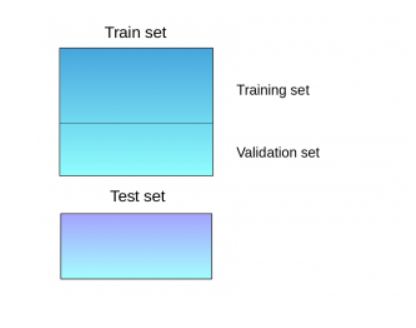

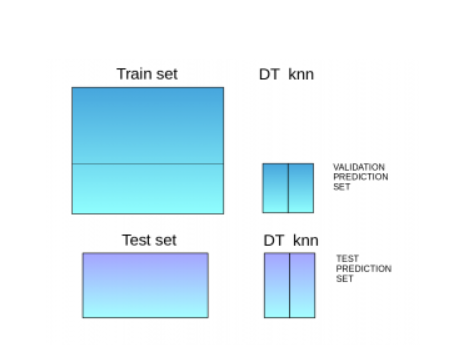

The train set is split into training and validation sets

Model(s) are fitted on the training set.

The predictions are made on the validation set and the test set

The validation set and its predictions are used as features to build a new model.

This model is used to make final predictions on the test and meta-features.


In [ ]:
# print(X_train.shape)
# print(X_test.shape)
# print(Y_train.shape)
# print(Y_test.shape)

In [ ]:
# from sklearn.model_selection import train_test_split
# x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

# model1 = DecisionTreeClassifier()
# model1.fit(x_train, y_train)
# val_pred1=model1.predict(x_val)
# test_pred1=model1.predict(X_test)
# val_pred1=pd.DataFrame(val_pred1)
# test_pred1=pd.DataFrame(test_pred1)

# model2 = KNeighborsClassifier()
# model2.fit(x_train,y_train)
# val_pred2=model2.predict(x_val)
# test_pred2=model2.predict(X_test)
# val_pred2=pd.DataFrame(val_pred2)
# test_pred2=pd.DataFrame(test_pred2)


# df_val=pd.concat([x_val, val_pred1],axis=1)
# df_test=pd.concat([X_test, test_pred1,test_pred2],axis=1)

# model = LogisticRegression()
# model.fit(df_val,y_val)
# model.score(df_test,y_test)


In [ ]:
# df_val

In [ ]:
# print(val_pred1.shape)
# print(test_pred1.shape)
# print(val_pred2.shape)
# print(test_pred2.shape)

In [ ]:
# print(x_train.shape)
# print(x_val.shape)
# print(y_train.shape)
# print(y_val.shape)

**Bagging**

The idea behind bagging is combining the results of multiple models (for instance, all decision trees) to get a generalized result.

Bootstrapping is a sampling technique in which we create subsets of observations from the original dataset, with replacement. The size of the subsets is the same as the size of the original set.

Bagging (or Bootstrap Aggregating) technique uses these subsets (bags) to get a fair idea of the distribution (complete set). The size of subsets created for bagging may be less than the original set.



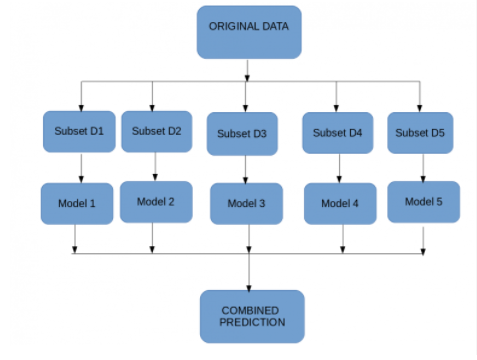

Multiple subsets are created from the original dataset, selecting observations with replacement.

A base model (weak model) is created on each of these subsets.

The models run in parallel and are independent of each other.

The final predictions are determined by combining the predictions from all the models (Voting , Averaging).


**Boosting**

Boosting is a sequential process, where each subsequent model attempts to correct the errors of the previous model. The succeeding models are dependent on the previous model. Let’s understand the way boosting works in the below steps

A subset is created from the original dataset.

Initially, all data points are given equal weights.

A base model is created on this subset.

This model is used to make predictions on the whole dataset.

Errors are calculated using the actual values and predicted values.

The observations which are incorrectly predicted, are given higher weights.

(Here, the three misclassified blue-plus points will be given higher weights)
Another model is created and predictions are made on the dataset.

(This model tries to correct the errors from the previous model)
Similarly, multiple models are created, each correcting the errors of the previous model.

The final model (strong learner) is the weighted mean of all the models (weak learners).


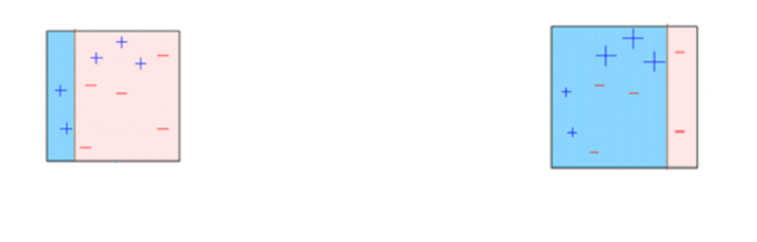

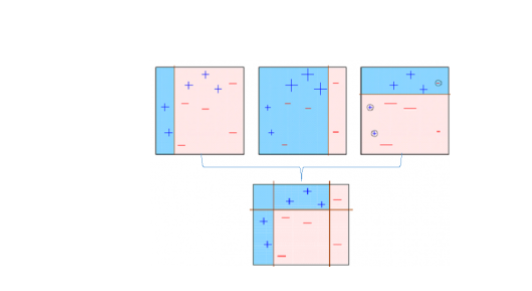

**Algorithms based on Bagging and Boosting**


Bagging and Boosting are two of the most commonly used techniques in machine learning. In this section, we will look at them in detail. Following are the algorithms we will be focusing on:


# **Bagging algorithms:**

**Bagging meta-estimator**

Bagging meta-estimator is an ensemble algorithm that can be used for both classification (BaggingClassifier) and regression (BaggingRegressor) problems.


Steps:

Random subsets are created from the original dataset (Bootstrapping).

The subset of the dataset includes all features.

A user-specified base estimator is fitted on each of these smaller sets.

Predictions from each model are combined to get the final result.


In [ ]:
# Sample code for Classifier problem

from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, Y_train)
model.score(X_test,Y_test)


# # Sample code for regression problem

# from sklearn.ensemble import BaggingRegressor
# model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
# model.fit(x_train, y_train)
# model.score(x_test,y_test)


0.98

In [ ]:
model.predict(X_test)

array(['DrugY', 'drugX', 'drugC', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'drugC', 'drugX', 'drugX', 'drugX', 'drugX',
       'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugA', 'DrugY', 'drugB', 'DrugY', 'drugC', 'DrugY',
       'drugX', 'drugA', 'DrugY', 'drugX', 'drugX', 'drugA', 'DrugY',
       'drugB', 'DrugY', 'drugA', 'drugX', 'drugA', 'DrugY', 'DrugY',
       'DrugY', 'drugB', 'drugA', 'DrugY', 'drugX', 'DrugY', 'drugB',
       'drugX'], dtype=object)

Parameters used in the  algorithms:


base_estimator:

It defines the base estimator to fit on random subsets of the dataset.
When nothing is specified, the base estimator is a decision tree.

n_estimators:

It is the number of base estimators to be created.
The number of estimators should be carefully tuned as a large number would take a very long time to run, while a very small number might not provide the best results.

max_samples:

This parameter controls the size of the subsets.
It is the maximum number of samples to train each base estimator.

max_features:

Controls the number of features to draw from the whole dataset.
It defines the maximum number of features required to train each base estimator.

n_jobs:

The number of jobs to run in parallel.
Set this value equal to the cores in your system.
If -1, the number of jobs is set to the number of cores.

random_state:

It specifies the method of random split. When the random state value is the same for two models, the random selection is the same for both models.
This parameter is useful when you want to compare different models.


**Random forest**

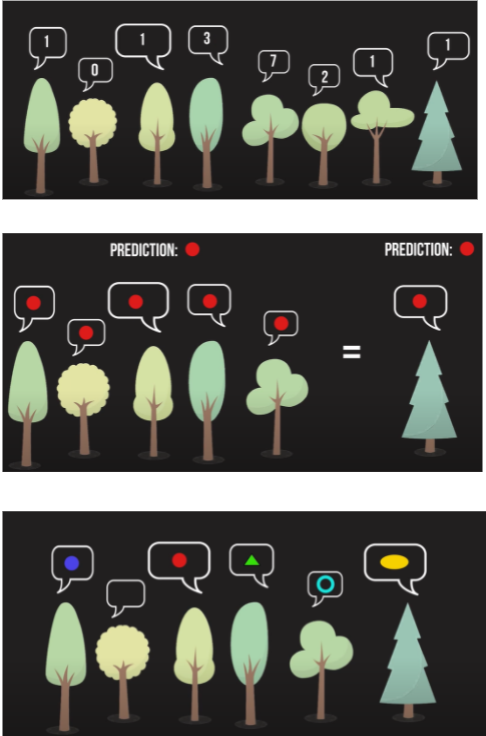

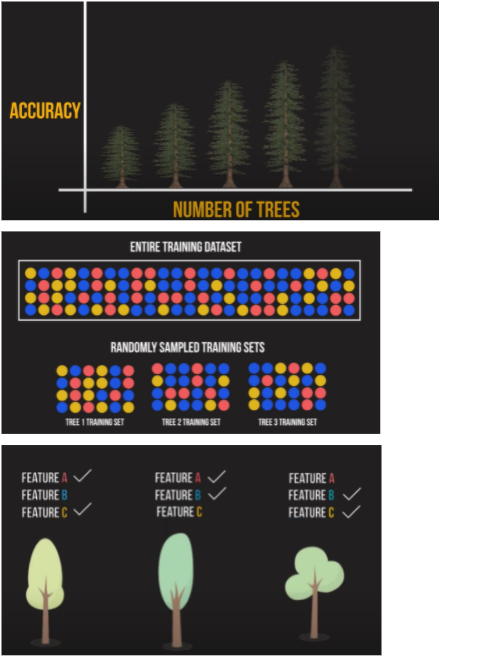

The base estimators in random forest are decision trees. Unlike bagging meta estimators, random forest randomly selects a set of features which are used to decide the best split at each node of the decision tree.


Looking at it step-by-step, this is what a random forest model does:


Random subsets are created from the original dataset (bootstrapping).

At each node in the decision tree, only a random set of features are considered to decide the best split.

A decision tree model is fitted on each of the subsets.

The final prediction is calculated by averaging the predictions from all decision trees.


To sum up, Random forest randomly selects data points and features, and builds multiple trees (Forest) 


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
 

model = RandomForestClassifier()
 
model.fit(X_train,Y_train)
 
print('Number of Trees used : ', model.n_estimators)
 
predict_train = model.predict(X_train)
print('\nTarget on train data',predict_train)
accuracy_train = accuracy_score(Y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)
predict_test = model.predict(X_test)
print('\nTarget on test data',predict_test)
accuracy_test = accuracy_score(Y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)

NameError: ignored

In [2]:
from sklearn.ensemble import RandomForestClassifier

Parameters

n_estimators:

It defines the number of decision trees to be created in a random forest.
Generally, a higher number makes the predictions stronger and more stable, but a very large number can result in higher training time.

criterion:

It defines the function that is to be used for splitting.
The function measures the quality of a split for each feature and chooses the best split.

max_features :

It defines the maximum number of features allowed for the split in each decision tree.
Increasing max features usually improve performance but a very high number can decrease the diversity of each tree.

max_depth:

Random forest has multiple decision trees. This parameter defines the maximum depth of the trees.

min_samples_split:

Used to define the minimum number of samples required in a leaf node before a split is attempted.
If the number of samples is less than the required number, the node is not split.

min_samples_leaf:

This defines the minimum number of samples required to be at a leaf node.
Smaller leaf size makes the model more prone to capturing noise in train data.

max_leaf_nodes:

This parameter specifies the maximum number of leaf nodes for each tree.
The tree stops splitting when the number of leaf nodes becomes equal to the max leaf node.

n_jobs:

This indicates the number of jobs to run in parallel.
Set value to -1 if you want it to run on all cores in the system.

random_state:

This parameter is used to define the random selection.
It is used for comparison between various models


# **Boosting algorithms:**

**AdaBoost**

Adaptive boosting or AdaBoost is one of the simplest boosting algorithms. Usually, decision trees are used for modelling. Multiple sequential models are created, each correcting the errors from the last model. AdaBoost assigns weights to the observations which are incorrectly predicted and the subsequent model works to predict these values correctly.



Steps:

Initially, all observations in the dataset are given equal weights.

A model is built on a subset of data. 

Using this model, predictions are made on the whole dataset.

Errors are calculated by comparing the predictions and actual values.

While creating the next model, higher weights are given to the data points which were predicted incorrectly.

Weights can be determined using the error value. For instance, higher the error more is the weight assigned to the observation.

This process is repeated until the error function does not change, or the maximum limit of the number of estimators is reached.


In [ ]:
# Sample code for Classifier problem:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(X_train, Y_train)
model.score(X_test,Y_test)


# # Sample code for regression problem:
# from sklearn.ensemble import AdaBoostRegressor
# model = AdaBoostRegressor()
# model.fit(x_train, y_train)
# model.score(x_test,y_test)


0.7

In [ ]:
model.predict(X_test)

array(['DrugY', 'drugX', 'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugX',
       'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugX', 'drugX', 'drugX', 'DrugY',
       'drugX', 'DrugY', 'drugX', 'drugX', 'drugX', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'drugX', 'DrugY', 'drugX', 'DrugY', 'drugX',
       'drugX'], dtype=object)

Parameters


base_estimators:
It helps to specify the type of base estimator, that is, the machine learning algorithm to be used as base learner.

n_estimators:
It defines the number of base estimators.
The default value is 10, but you should keep a higher value to get better performance.

learning_rate:
This parameter controls the contribution of the estimators in the final combination.
There is a trade-off between learning_rate and n_estimators.

max_depth:
Defines the maximum depth of the individual estimator.
Tune this parameter for best performance.

n_jobs
Specifies the number of processors it is allowed to use.
Set value to -1 for maximum processors allowed.

random_state :
An integer value to specify the random data split.
A definite value of random_state will always produce the same results if given with the same parameters and training data.


**GBM**


Gradient Boosting or GBM is another ensemble machine learning algorithm that works for both regression and classification problems. GBM uses the boosting technique, combining a number of weak learners to form a strong learner. Regression trees used as a base learner, each subsequent tree in series is built on the errors calculated by the previous tree.


In [ ]:
# Code:


from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(X_train, Y_train)
model.score(X_test,Y_test)



# # Sample code for regression problem:
# from sklearn.ensemble import GradientBoostingRegressor
# model= GradientBoostingRegressor()
# model.fit(x_train, y_train)
# model.score(x_test,y_test)


0.94

In [ ]:
model.predict(X_test)

array(['DrugY', 'drugX', 'drugC', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'drugC', 'drugX', 'drugX', 'drugX', 'drugX',
       'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugA', 'DrugY', 'drugB', 'DrugY', 'drugC', 'DrugY',
       'drugX', 'drugA', 'DrugY', 'drugX', 'drugX', 'DrugY', 'DrugY',
       'drugB', 'DrugY', 'DrugY', 'drugX', 'drugA', 'DrugY', 'DrugY',
       'DrugY', 'drugB', 'drugA', 'DrugY', 'drugX', 'DrugY', 'drugB',
       'drugX'], dtype=object)

**XGBM**



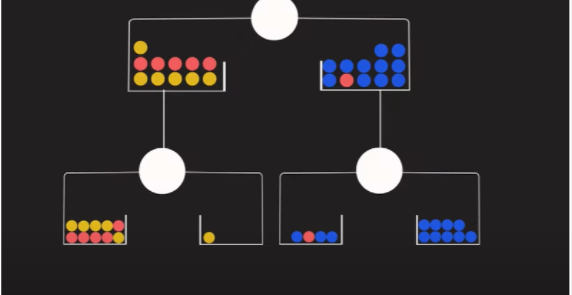

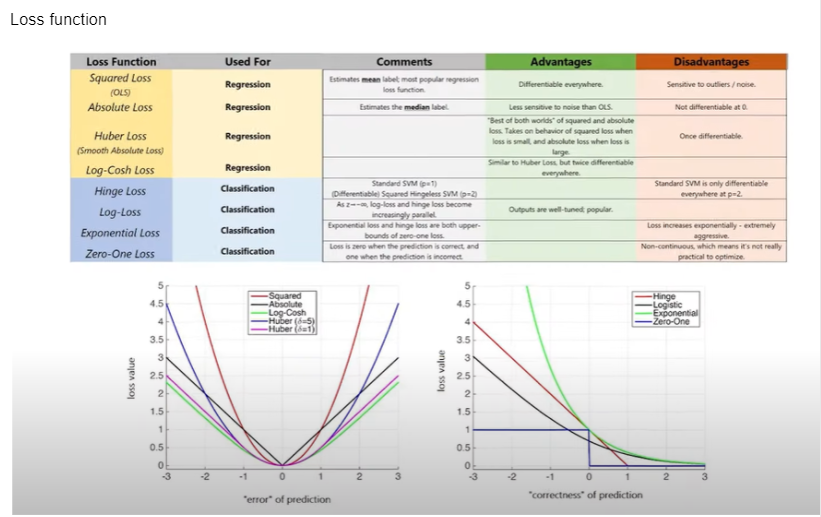

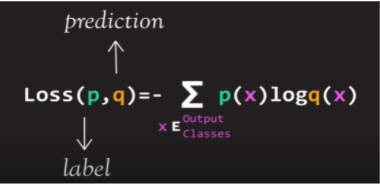

When p and q are almost identical , loss is low and reverse is also true.

**Cross entropy is a popular choice.**

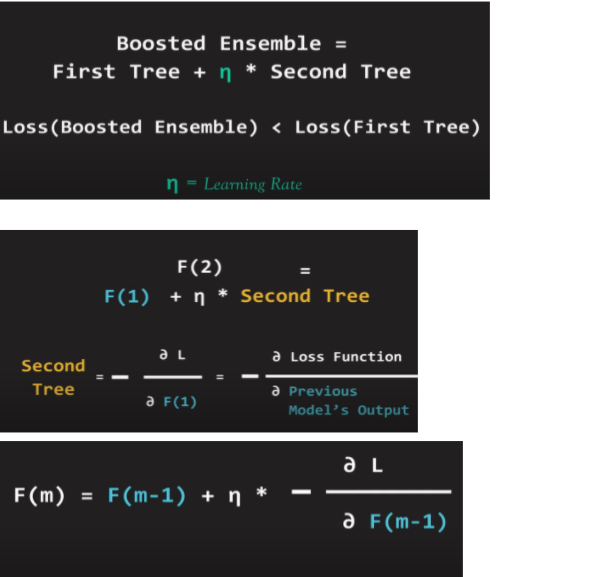

XGBoost (extreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm. XGBoost has proved to be a highly effective ML algorithm, extensively used in machine learning competitions and hackathons. XGBoost has high predictive power and is almost 10 times faster than the other gradient boosting techniques. It also includes a variety of regularization which reduces overfitting and improves overall performance. Hence it is also known as ‘regularized boosting‘ technique.




Let us see how XGBoost is comparatively better than other techniques:

Regularization:
Standard GBM implementation has no regularisation like XGBoost.
Thus XGBoost also helps to reduce overfitting.

Parallel Processing:
XGBoost implements parallel processing and is faster than GBM .
XGBoost also supports implementation on Hadoop.

High Flexibility:
XGBoost allows users to define custom optimization objectives and evaluation criteria adding a whole new dimension to the model.

Handling Missing Values:
XGBoost has an in-built routine to handle missing values.

Tree Pruning:
XGBoost makes splits up to the max_depth specified and then starts pruning the tree backwards and removes splits beyond which there is no positive gain.

Built-in Cross-Validation:
XGBoost allows a user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run.


Since XGBoost takes care of the missing values itself, you do not have to impute the missing values. You can skip the step for missing value imputation


In [ ]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, Y_train)
model.score(X_test,Y_test)

# # code-II (Regressor)

# import xgboost as xgb
# model=xgb.XGBRegressor()
# model.fit(x_train, y_train)
# model.score(x_test,y_test)


0.96

**Parameters**


nthread
This is used for parallel processing and the number of cores in the system should be entered..
If you wish to run on all cores, do not input this value. The algorithm will detect it automatically.

eta
Analogous to learning rate in GBM.
Makes the model more robust by shrinking the weights on each step.

min_child_weight
Defines the minimum sum of weights of all observations required in a child.
Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.

max_depth
It is used to define the maximum depth.
Higher depth will allow the model to learn relations very specific to a particular sample.

max_leaf_nodes
The maximum number of terminal nodes or leaves in a tree.
Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
If this is defined, GBM will ignore max_depth.

gamma

A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.

subsample
Same as the subsample of GBM. Denotes the fraction of observations to be randomly sampled for each tree.
Lower values make the algorithm more conservative and prevent overfitting but values that are too small might lead to under-fitting.

colsample_bytree
It is similar to max_features in GBM.
Denotes the fraction of columns to be randomly sampled for each tree.


**Light GBM**

Light GBM beats all the other algorithms when the dataset is extremely large. Compared to the other algorithms, Light GBM takes less time to run on a huge dataset.

LightGBM is a gradient boosting framework that uses tree-based algorithms and follows a leaf-wise approach while other algorithms work in a level-wise approach pattern. 

The images below will help you understand the difference in a better way.


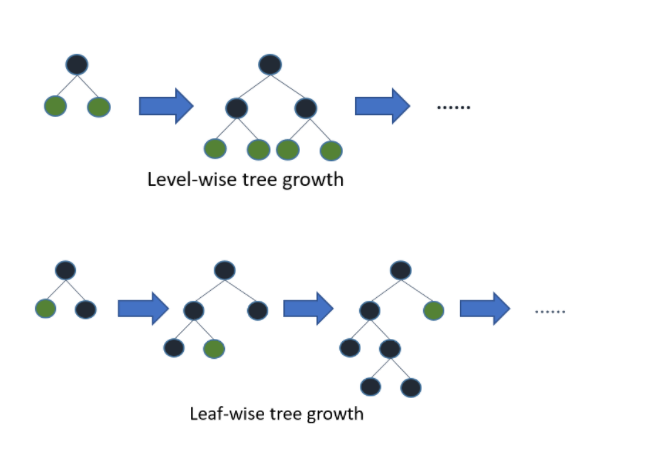

Leaf-wise growth may cause overfitting on smaller datasets but that can be avoided by using the ‘max_depth’ parameter for learning. 

In [ ]:
# import lightgbm as lgb

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(objective='multiclass', random_state=5)

lgbm.fit(X_train, Y_train)

y_pred = lgbm.predict(X_test)
print(lgbm.score(X_test,Y_test))
y_pred
 
# Sample code for regression problem:


# import lightgbm as lgb
# train_data=lgb.Dataset(x_train,label=y_train)
# params = {'learning_rate':0.001}
# model= lgb.train(params, train_data, 100)
# from sklearn.metrics import mean_squared_error
# rmse=mean_squared_error(y_pred,y_test)**0.5


0.96


array(['DrugY', 'drugX', 'drugC', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'drugC', 'drugX', 'drugX', 'drugX', 'drugX',
       'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugA', 'DrugY', 'drugB', 'DrugY', 'drugC', 'DrugY',
       'drugX', 'drugA', 'DrugY', 'drugX', 'drugX', 'drugA', 'DrugY',
       'drugB', 'DrugY', 'drugC', 'drugX', 'drugA', 'DrugY', 'DrugY',
       'DrugY', 'drugB', 'drugA', 'DrugY', 'drugX', 'DrugY', 'drugB',
       'drugX'], dtype=object)

Parameters


num_iterations:
It defines the number of boosting iterations to be performed.

num_leaves :
This parameter is used to set the number of leaves to be formed in a tree.
In case of Light GBM, since splitting takes place leaf-wise rather than depth-wise, num_leaves must be smaller than 2^(max_depth), otherwise, it may lead to overfitting.

min_data_in_leaf :
A very small value may cause overfitting.
It is also one of the most important parameters in dealing with overfitting.

max_depth:
It specifies the maximum depth or level up to which a tree can grow.
A very high value for this parameter can cause overfitting.

bagging_fraction:
It is used to specify the fraction of data to be used for each iteration.
This parameter is generally used to speed up the training.

max_bin :
Defines the max number of bins that feature values will be bucketed in.
A smaller value of max_bin can save a lot of time as it buckets the feature values in discrete bins which is computationally inexpensive.


**CatBoost**

CatBoost can automatically deal with categorical variables and does not require extensive data preprocessing like other machine learning algorithms.


The CatBoost algorithm effectively deals with categorical variables. Thus, you should not perform one-hot encoding for categorical variables. Just load the files, impute missing values, and you’re good to go.




In [ ]:
# from catboost import CatBoostClassifier
# model=CatBoostClassifier()
# categorical_features_indices = np.where(data.dtypes != np.float)[0]
# # model.fit(x_train,y_train,cat_features=([ 0,  1, 2, 3, 4, 10]),eval_set=(x_test, y_test))
# # model.score(x_test,y_test)
# categorical_features_indices


# # Sample code for regression problem:
# from catboost import CatBoostRegressor
# model=CatBoostRegressor()
# categorical_features_indices = np.where(df.dtypes != np.float)[0]
# model.fit(x_train,y_train,cat_features=([ 0,  1, 2, 3, 4, 10]),eval_set=(x_test, y_test))
# model.score(x_test,y_test)


**Parameters**


loss_function:
Defines the metric to be used for training.

iterations:
The maximum number of trees that can be built.
The final number of trees may be less than or equal to this number.

learning_rate:
Defines the learning rate.
Used for reducing the gradient step.

border_count:
It specifies the number of splits for numerical features.
It is similar to the max_bin parameter.

depth:
Defines the depth of the trees.

random_seed:
This parameter is similar to the ‘random_state’ parameter we have seen previously.
It is an integer value to define the random seed for training.
 
